<a href="https://colab.research.google.com/github/Aksharajm/Example/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 38.54 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 24.2MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=066bc3d9556bc2407bc7b127a949f4ad1fe76679d86ec332c1506ffd46220f3a
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=4910e714389323921c09116f8f738aae776cdeb4c7f1245458d982beb6a5a6c4
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Dataset/4/test.zip" -d "/content/pix2pix/datasets/"

Archive:  /content/drive/MyDrive/Dataset/4/test.zip
   creating: /content/pix2pix/datasets/test/
  inflating: /content/pix2pix/datasets/test/408.png  
  inflating: /content/pix2pix/datasets/test/11750.png  
  inflating: /content/pix2pix/datasets/test/10500.png  
  inflating: /content/pix2pix/datasets/test/2542.png  
  inflating: /content/pix2pix/datasets/test/10291.png  
  inflating: /content/pix2pix/datasets/test/652.png  
  inflating: /content/pix2pix/datasets/test/9721.png  
  inflating: /content/pix2pix/datasets/test/70.png  
  inflating: /content/pix2pix/datasets/test/14554.png  
  inflating: /content/pix2pix/datasets/test/15424.png  
  inflating: /content/pix2pix/datasets/test/7338.png  
  inflating: /content/pix2pix/datasets/test/5401.png  
  inflating: /content/pix2pix/datasets/test/1632.png  
  inflating: /content/pix2pix/datasets/test/4949.png  
  inflating: /content/pix2pix/datasets/test/3117.png  
  inflating: /content/pix2pix/datasets/test/7949.png  
  inflating: /content/

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
!python train.py --dataroot ./datasets --name pix2pix --model pix2pix --direction AtoB

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets                    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

pix2pix


In [ ]:
!python test.py --dataroot ./datasets --direction AtoB --model pix2pix --name pix2pix

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets                    	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

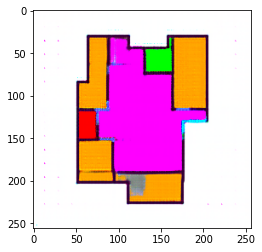

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/pix2pix/test_latest/images/10291_fake_B.png')
plt.imshow(img)

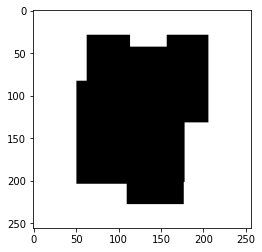

In [ ]:
img = plt.imread('./results/pix2pix/test_latest/images/10291_real_A.png')
plt.imshow(img)

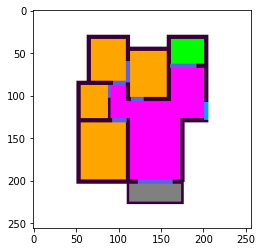

In [ ]:
img = plt.imread('./results/pix2pix/test_latest/images/10291_real_B.png')
plt.imshow(img)